# Vehicle Insurance Fraud Detection

# About Dataset
The dataset is an automobile insurance dataset “carclaims”, which is publically available and is provided by Angoss Knowledge Seeker. It has 15420 samples, of which 14497 are legitimate and 923 fraudulent, which indicates high class imbalance.

# Introduction
Fraud costs companies worldwide billions and billions of Euros per year, from workers who call sick to work to false claims. It is common to see a fraud detection department in every big company to reduce the cost of "cheating". One sector always targeted is insurance, and they put extra care and resources hoping to cut their losses regarding this matter.

For this project, we use an actual case where the dataset contains several features that relate to them to archive a "profile" of customers and a behavioural pattern for fraud commitment. Also, the dataset has a high-class imbalance, with only a 6% being a fraud.

The dataset used for this project is https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection to find.

# Project Goals
We set up two different goals; the first is to discover the proportion of the fraud occurring with the given data, which will allow us to consider an adjustment in the car policy prices regarding the variables.

The second one is to create a model to predict fraud and create a warning of possible fraud. It is essential for the analysis that Error type II is the lowest possible to avoid fraud with a moderate error type I not to drain company resources.

# LIbraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,8]
import scipy.stats as stats
pd.options.display.max_columns=None
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

# Understanding the data¶

In [3]:
data = pd.read_csv('carclaims.csv')

data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
data.shape
print('NO OF ROWS : ' , data.shape[0])
print('NO OF COLUMNS  :'  ,data.shape[1])

#Thre are 33 feature and 15420 rows are in the data.

NO OF ROWS :  15420
NO OF COLUMNS  : 33


In [5]:
data.isnull().sum().sum()
print('NULL VALUE IN THE DATA :' , data.isnull().sum().sum())

NULL VALUE IN THE DATA : 0


In [6]:
data.duplicated().sum()
print('DUPLICATED VALUES IN THE DATA :' ,data.duplicated().sum())

DUPLICATED VALUES IN THE DATA : 0


In [7]:
data['FraudFound']=data['FraudFound'].map({'No':0,'Yes':1})

#converting target variable to 1 and 0

In [9]:
num_cols = data.select_dtypes(include=np.number)
cat_cols= data.select_dtypes(include='object')

In [11]:
num_cols.drop(['Deductible','FraudFound'],axis=1,inplace=True)

In [12]:
print('NUMERICAL COLUMNS IN DATA  :--' ,num_cols)

NUMERICAL COLUMNS IN DATA  :--        WeekOfMonth  WeekOfMonthClaimed  Age  PolicyNumber  RepNumber  \
0                5                   1   21             1         12   
1                3                   4   34             2         15   
2                5                   2   47             3          7   
3                2                   1   65             4          4   
4                5                   2   27             5          3   
...            ...                 ...  ...           ...        ...   
15415            4                   5   35         15416          5   
15416            5                   1   30         15417         11   
15417            5                   1   24         15418          4   
15418            1                   2   34         15419          6   
15419            2                   3   21         15420          3   

       DriverRating  Year  
0                 1  1994  
1                 4  1994  
2                 3 

In [12]:
print('CATEGORICAL COLUMNS IN THE DATA : --' ,cat_cols)

CATEGORICAL COLUMNS IN THE DATA : --       Month  DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
0       Dec  Wednesday    Honda        Urban          Tuesday          Jan   
1       Jan  Wednesday    Honda        Urban           Monday          Jan   
2       Oct     Friday    Honda        Urban         Thursday          Nov   
3       Jun   Saturday   Toyota        Rural           Friday          Jul   
4       Jan     Monday    Honda        Urban          Tuesday          Feb   
...     ...        ...      ...          ...              ...          ...   
15415   Nov     Friday   Toyota        Urban          Tuesday          Nov   
15416   Nov   Thursday  Pontiac        Urban           Friday          Dec   
15417   Nov   Thursday   Toyota        Rural           Friday          Dec   
15418   Dec     Monday   Toyota        Urban         Thursday          Dec   
15419   Dec  Wednesday   Toyota        Urban         Thursday          Dec   

          Sex MaritalStatu

In [13]:
for i in cat_cols:
    print(i)
    print(data[i].value_counts(normalize=True)*100)
    print('-'*50)
    
#The value counts checaking for all categorical variables.To understand the variables.   

Month
Jan    9.150454
May    8.865110
Mar    8.819715
Jun    8.566796
Oct    8.463035
Dec    8.333333
Apr    8.300908
Feb    8.210117
Jul    8.151751
Sep    8.041505
Nov    7.788586
Aug    7.308690
Name: Month, dtype: float64
--------------------------------------------------
DayOfWeek
Monday       16.964981
Friday       15.856031
Tuesday      14.915694
Thursday     14.092088
Wednesday    14.001297
Saturday     12.853437
Sunday       11.316472
Name: DayOfWeek, dtype: float64
--------------------------------------------------
Make
Pontiac      24.883268
Toyota       20.239948
Honda        18.164721
Mazda        15.265888
Chevrolet    10.901427
Accura        3.060960
Ford          2.918288
VW            1.835279
Dodge         0.706874
Saab          0.700389
Mercury       0.538262
Saturn        0.376135
Nisson        0.194553
BMW           0.097276
Jaguar        0.038911
Porche        0.032425
Mecedes       0.025940
Ferrari       0.012970
Lexus         0.006485
Name: Make, dtype: float64


# UNDERSTANDING THE OUTLIERS 

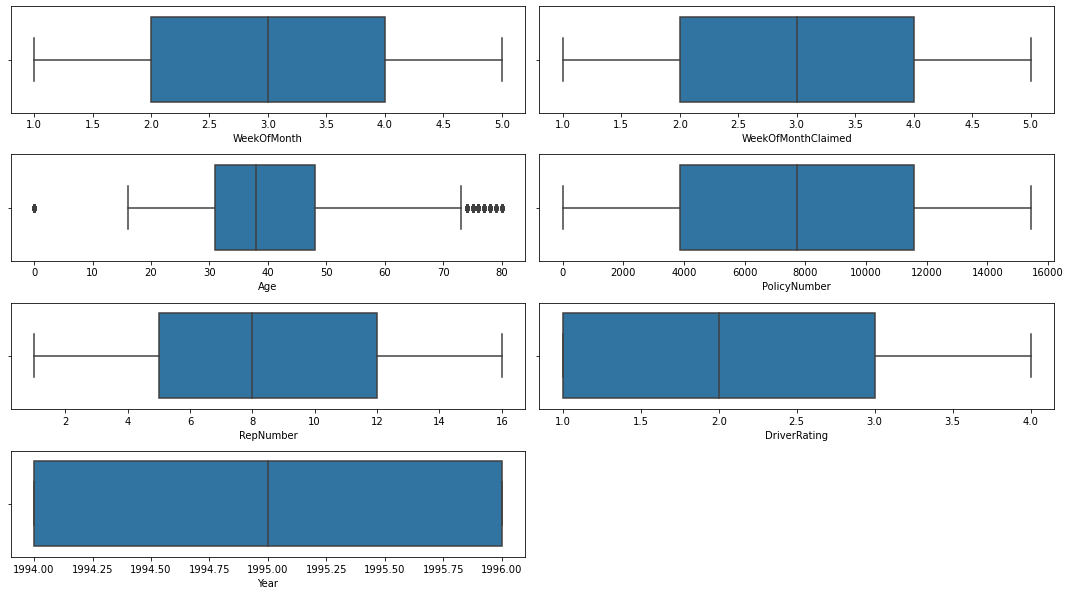

In [13]:
plt.figure(figsize=(15,10))
a = 1
for i in num_cols:
    plt.subplot(5,2,a)
    sns.boxplot(data[i])
    a+=1
plt.tight_layout()


#In the data outliers are present in  the 'Age ' columns.

Treatment of the outliers

In [35]:
# Age column has zero value and age group for the same is 16-17 so we will convert zero value to 17

def ageg(x):
    if x==0:
        return 17
    else:
        return x
    
data['Age']=data['Age'].apply(ageg)

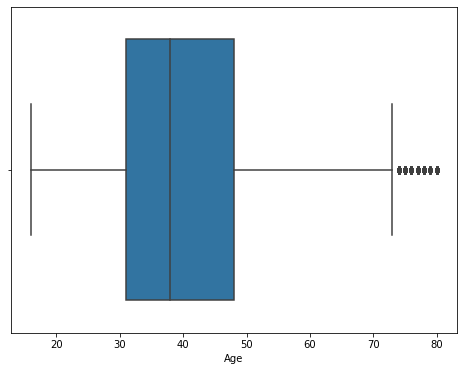

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Age'])
plt.show()

# Cheacking the distribution of the data

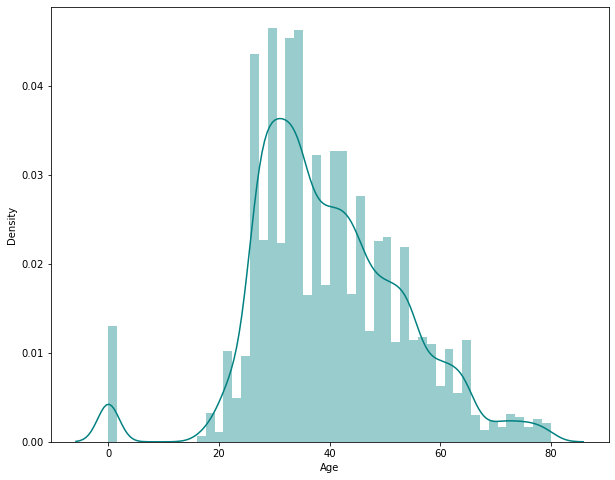

In [406]:
# Checking for distribution of the data
sns.distplot(data['Age'],color='teal')
plt.show()

# Univariate Analysis

 Cheacking Class imbalance or not 

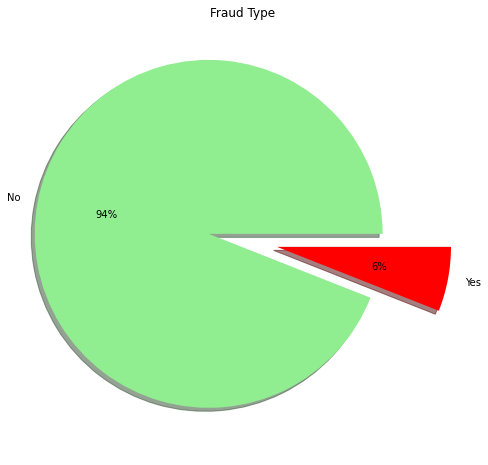

In [39]:
plt.figure(figsize=(10,8))
plt.pie(data.FraudFound.value_counts().values,labels=data.FraudFound.value_counts().index,
        autopct='%.0f%%',shadow=True,explode=[0.2,0.2],colors=['lightgreen','red'])
plt.title("Fraud Type")
plt.show()

# Data is highly Imbalance

multi-collinearity

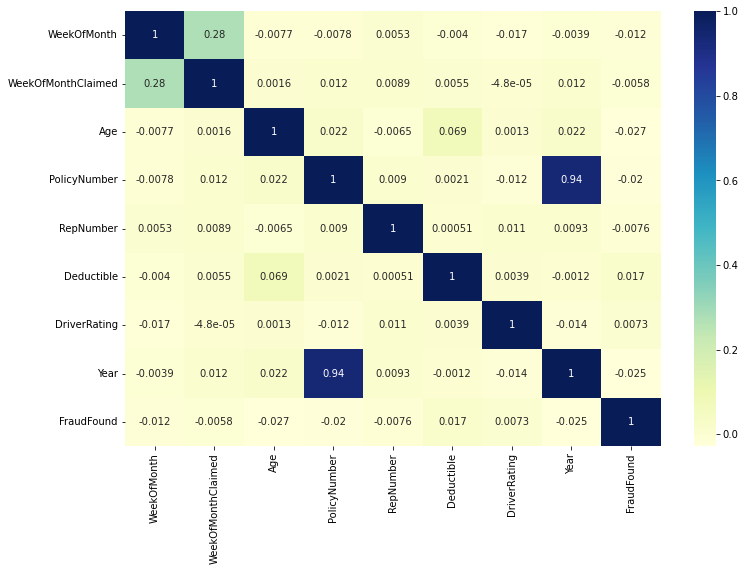

In [410]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()


Relationship between variables

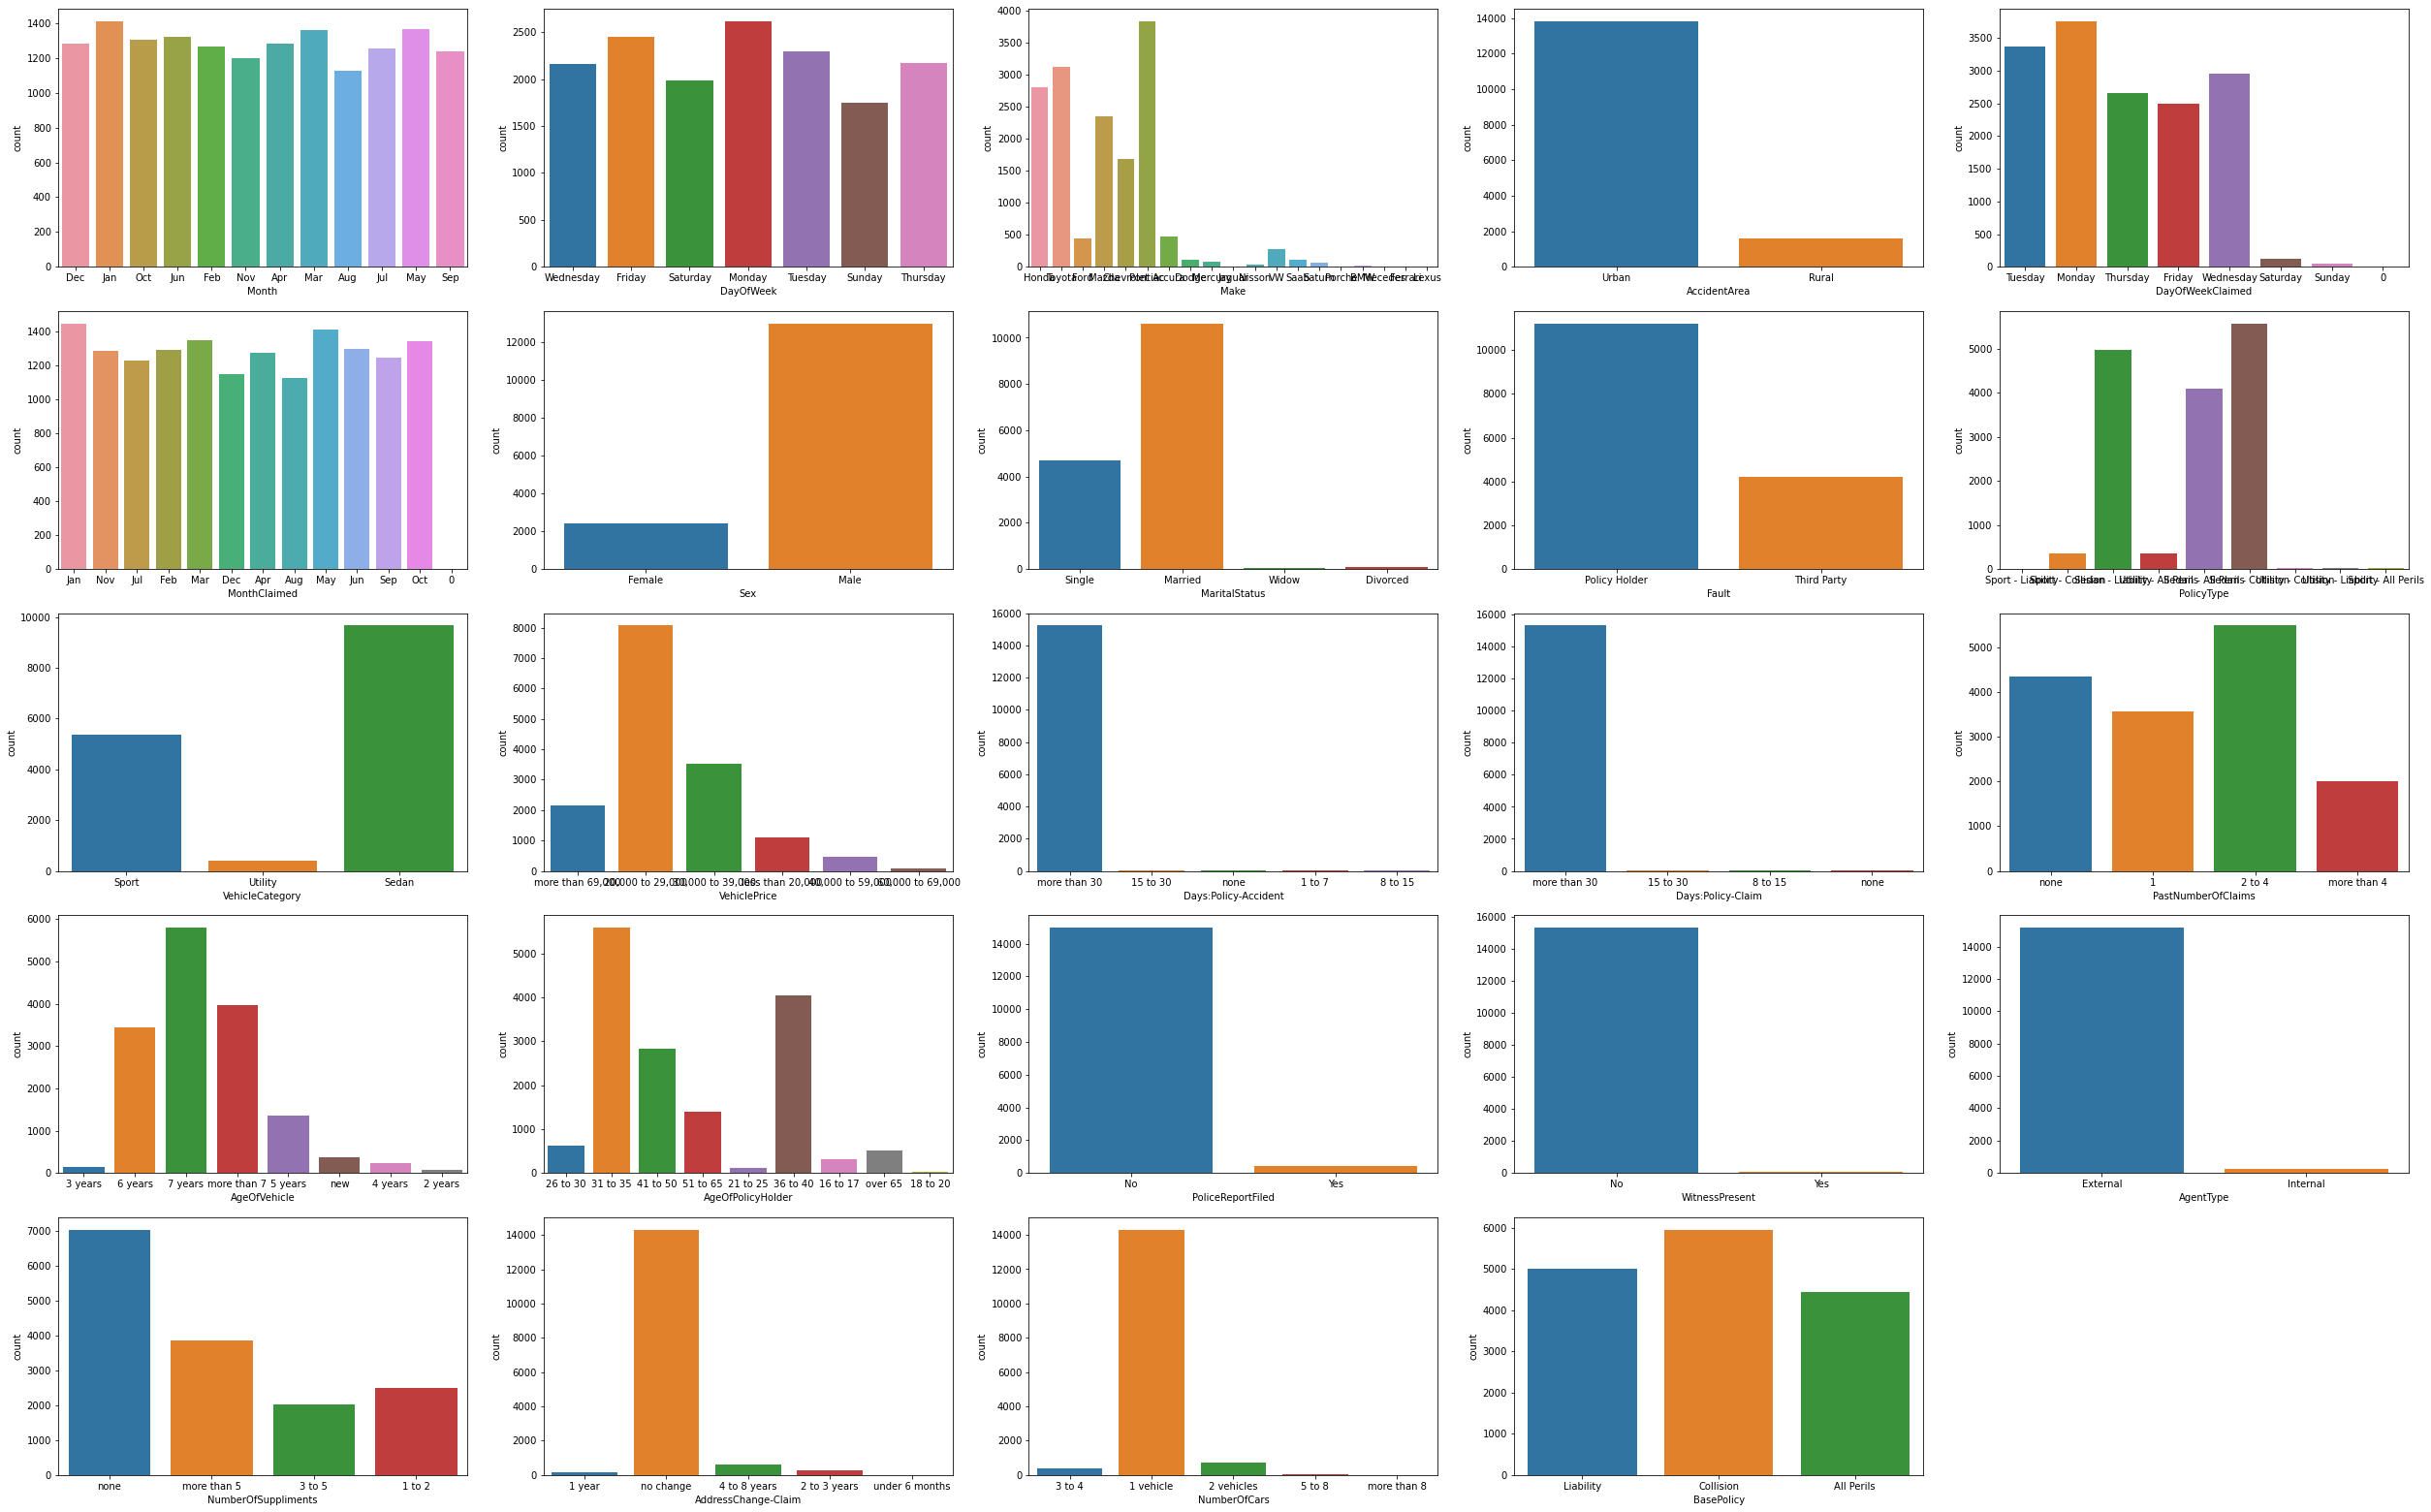

In [411]:
plt.figure(figsize=(35,30))
a = 1
for i in cat_cols:
    plt.subplot(7,5,a)
    sns.countplot(data[i])
    a+=1
plt.tight_layout()

# Jan,Mar and May has been registered with maximum number of ACCIDENTS
# Weekdays have the highest number of ACCIDENTS as compared to weekends
# Premium cars has less insruance claim and vehicles with lowest prices has highest claims
# Most of the claims and accidents are done one weekdays and are from Urban area
# Most of claimants are male 
# Most of the claimants are married followed by single
# Most of the vehicle category is Sedan
# Most of the claims have no witness present and no police reports are filed


# Bivariate Analysis

<Figure size 360x1080 with 0 Axes>

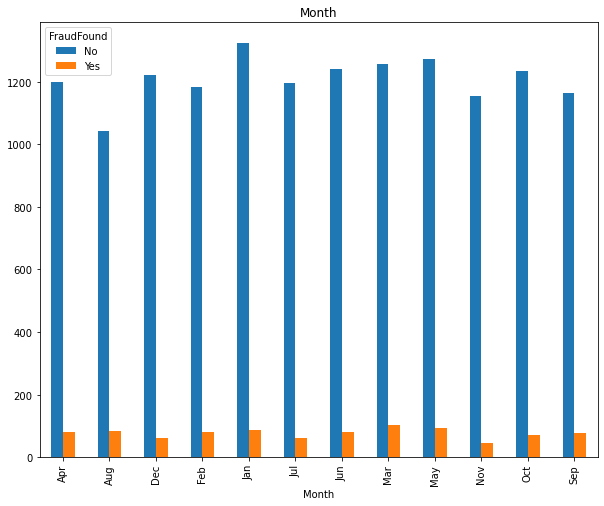

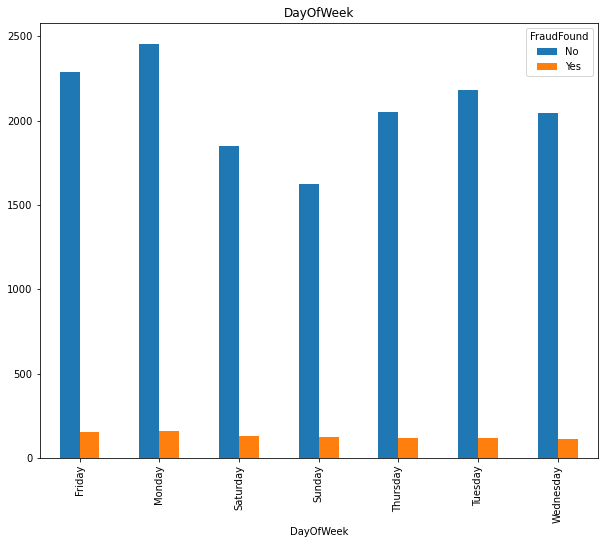

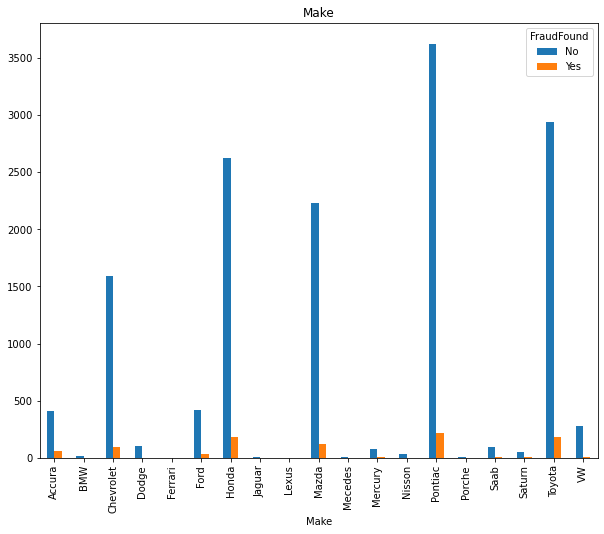

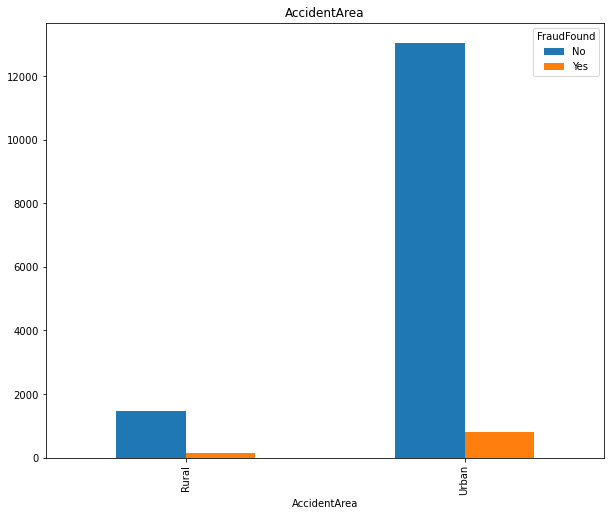

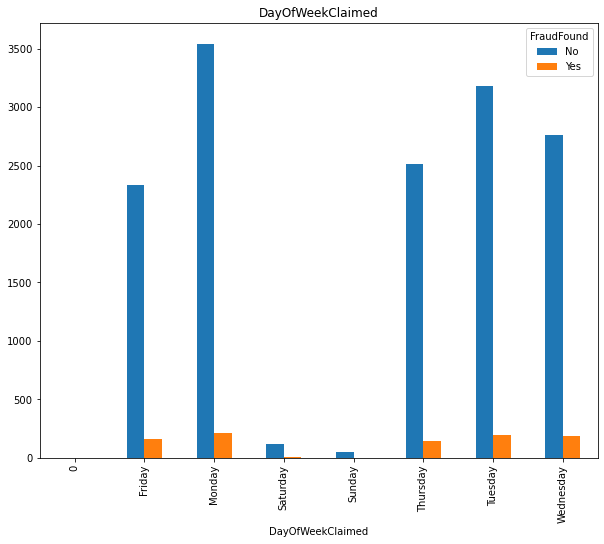

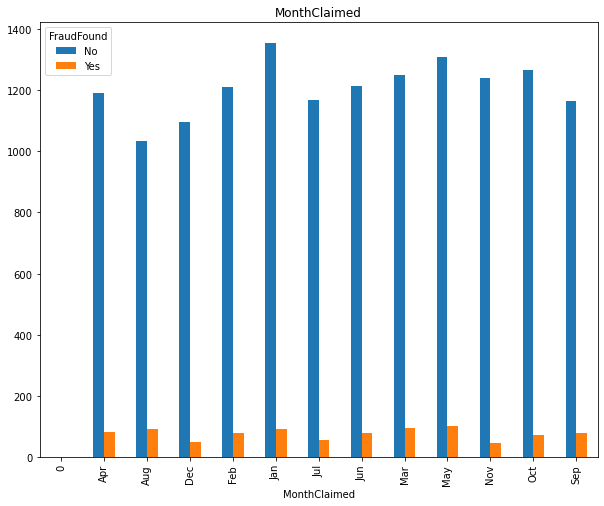

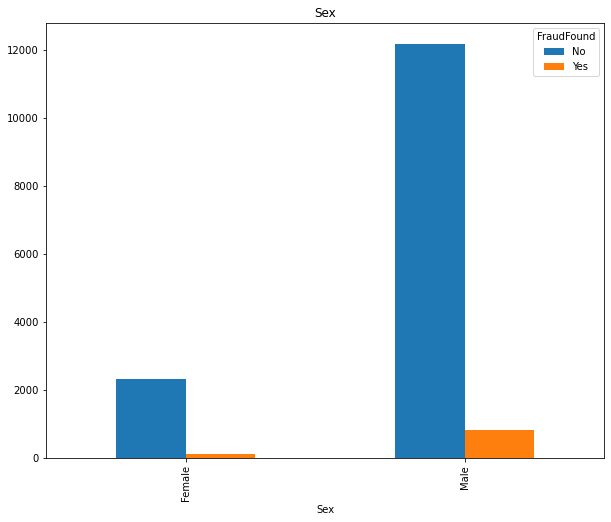

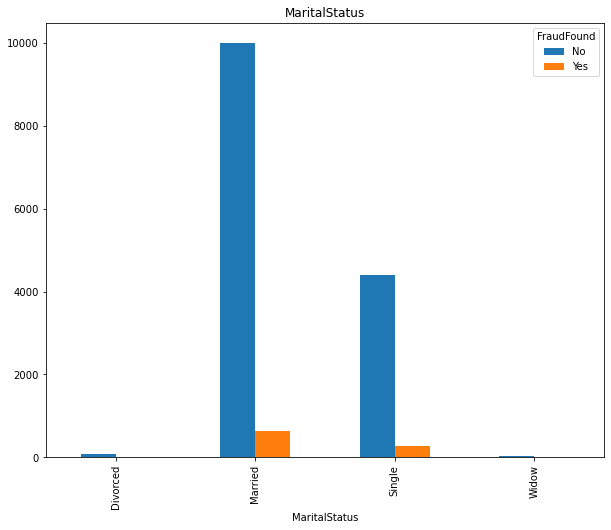

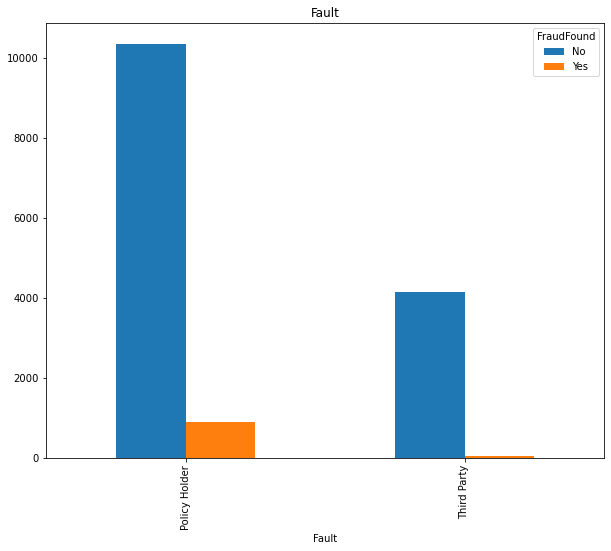

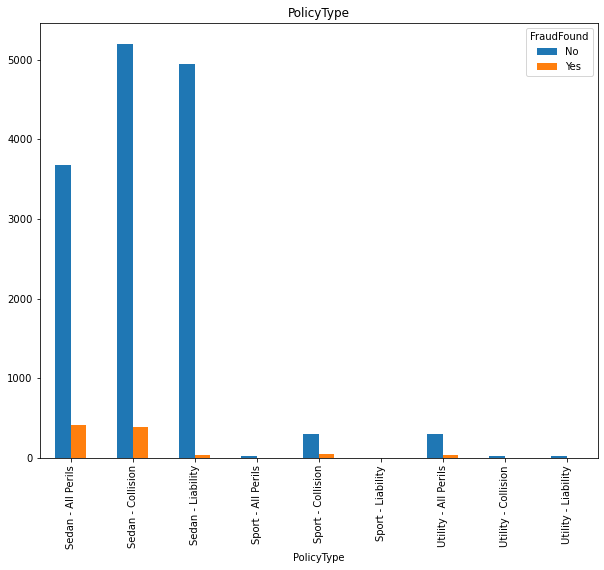

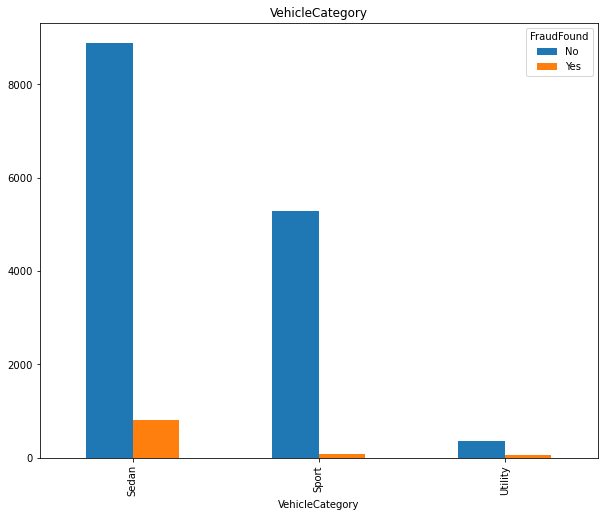

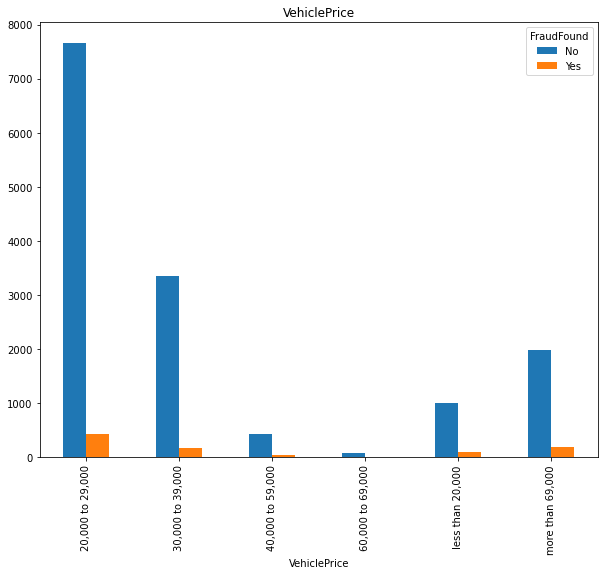

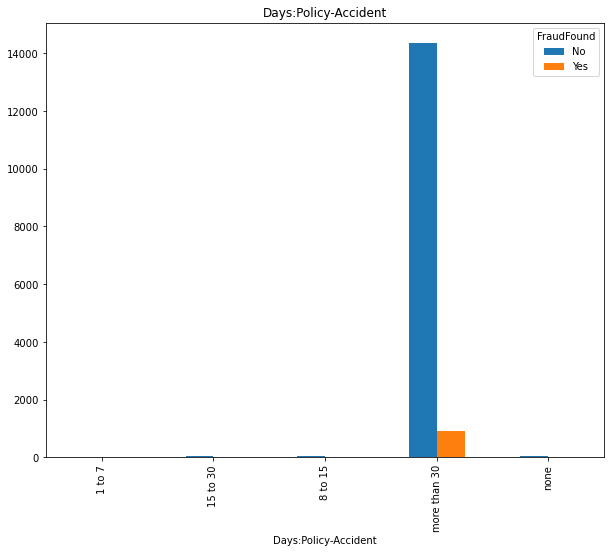

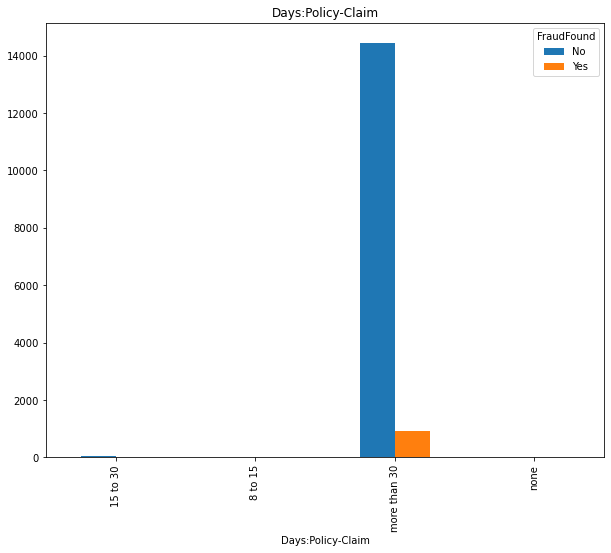

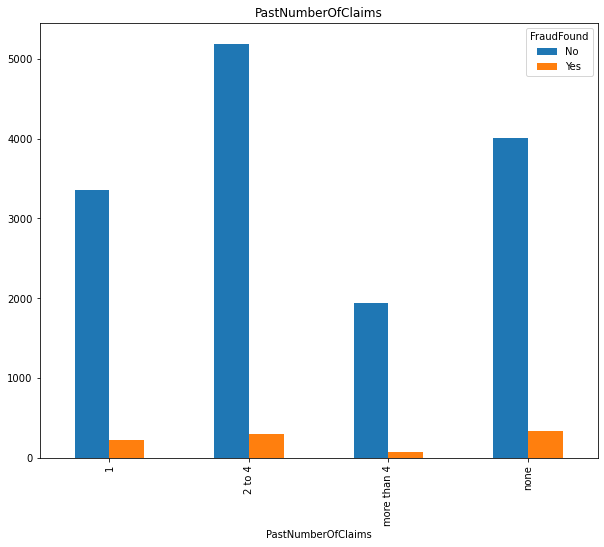

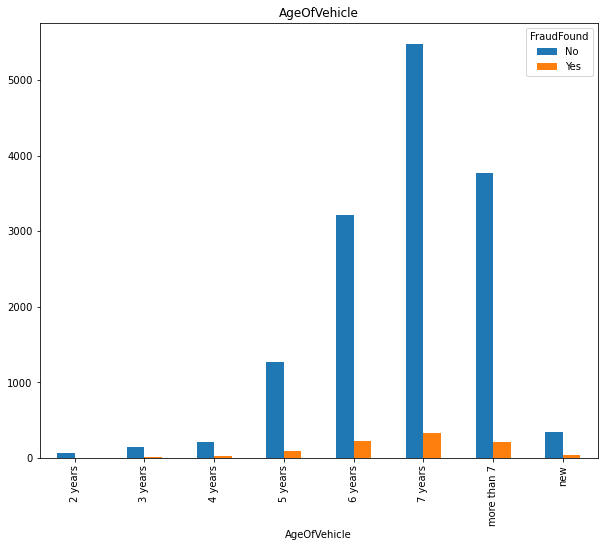

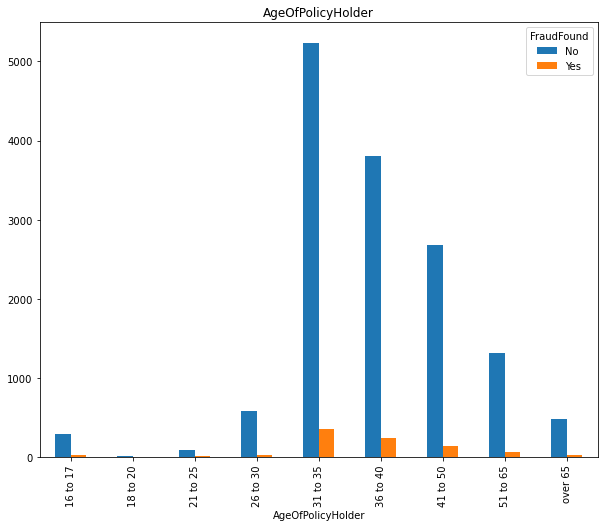

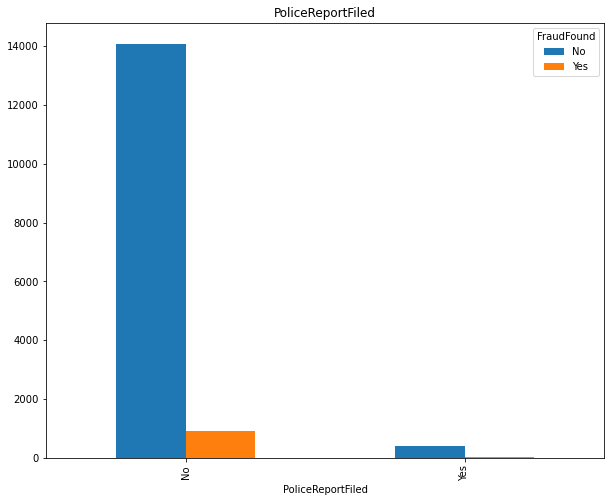

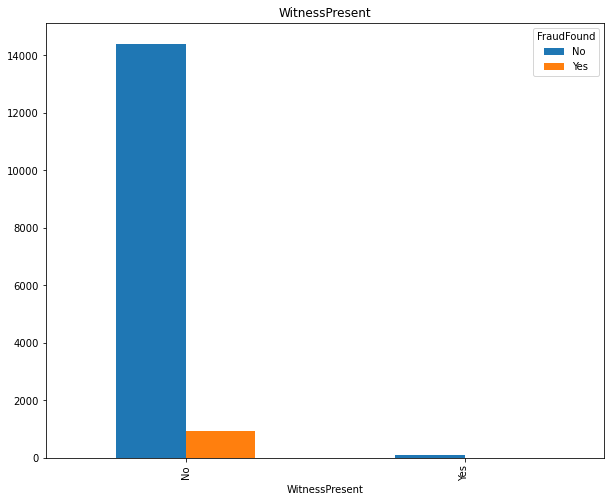

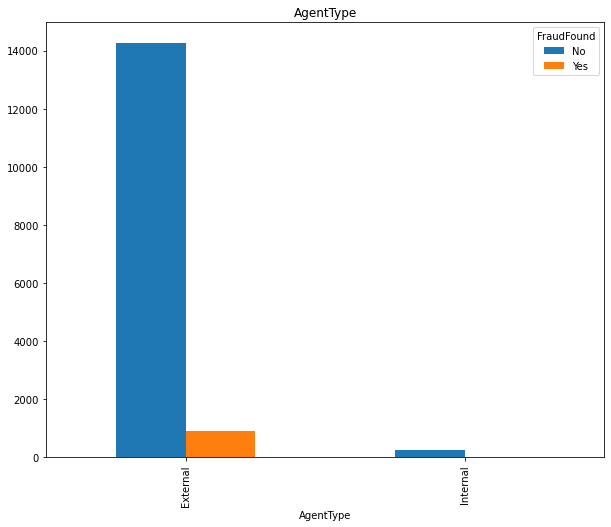

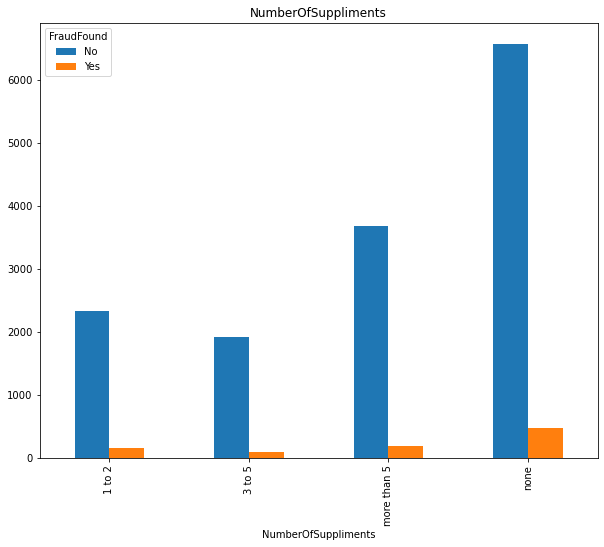

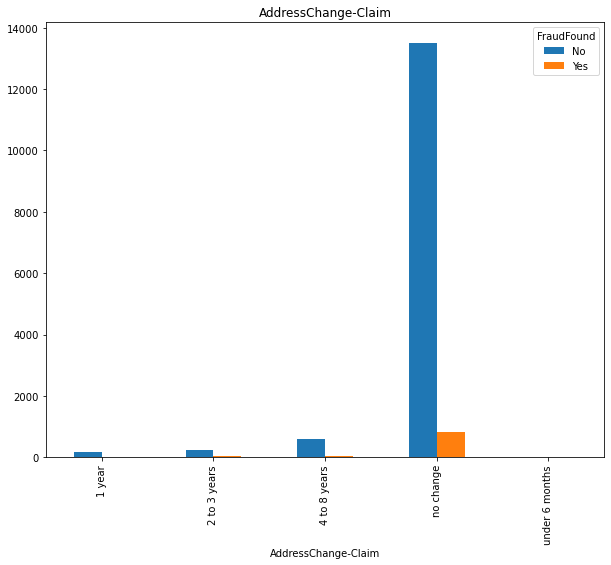

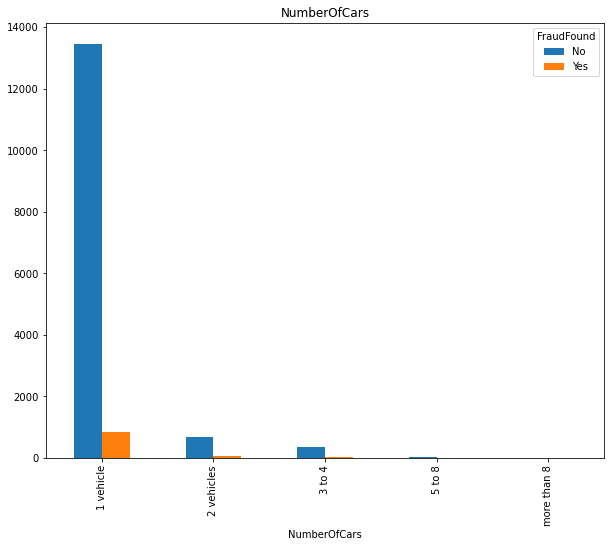

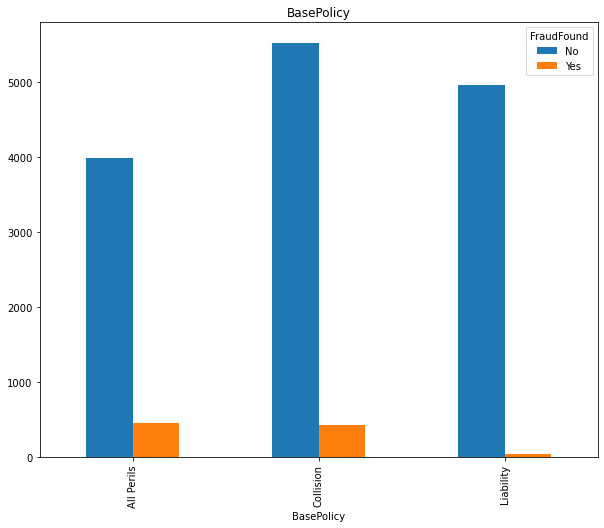

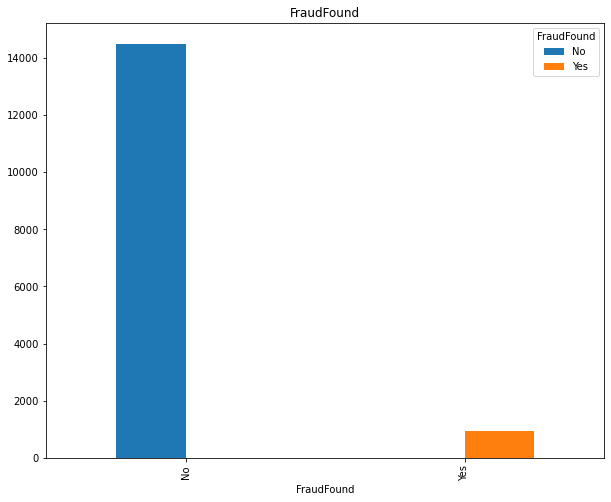

In [44]:
plt.figure(figsize=(5,15))
for i in cat_cols:                                                         #cat vs cat
    pd.crosstab(data.loc[:,i],data.FraudFound).plot(kind='bar')
    plt.title(i)
plt.show()

# Most of the Accidents are found in month of March,May,August and January while less frauds are found in month of Nov
# Most of the Accidents are found on Monday and Friday
#Most of the fraud claims are found to be of Pontaic, Toyota, Honda companies while Ford and Accura are found with less
#fraud claims
# Most of the fraud claims are found in urban areas compared with rural
# Most of fraud claims are found on Monday, Tuesday and Wednesday
# Most of the fraud insurance claims are found in month of Januray, March, May, August 
# Men has claimed fraud insurance in comparison to 
# Married population claimed more fraud insurance in comparison to single,divorced,widow
# Most of the frauds claims of insurance aare claimed by Policy holders with respect to third party
# Large number of fraud claims are found of sedan vehicaltype followed by sport and utility
# Most of the fraud claims are found in cars costing from 20,000 to 29,000
# age of vehicles under fraud claims of policy is 7 years
# Age of fraud claimants is between 31 to 35
# Most of fraud claimants has not registered police report
# Theres no witness persent in case of fraud claimants
# No of vehicles with fraud claimants is found to be 1


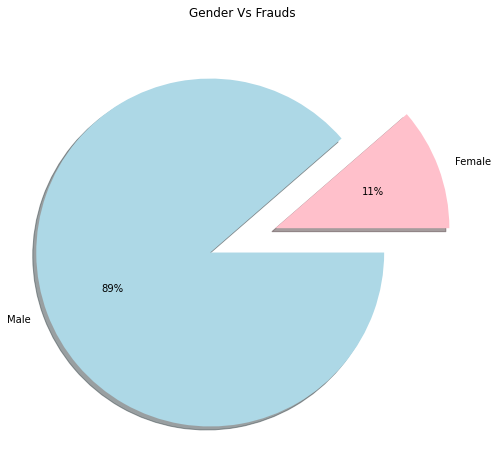

In [413]:
gender = data.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%',shadow=True,explode=[0.2,0.2],colors=['pink','lightblue'])

plt.show()


* Bivariate analysis for categorical and target variable

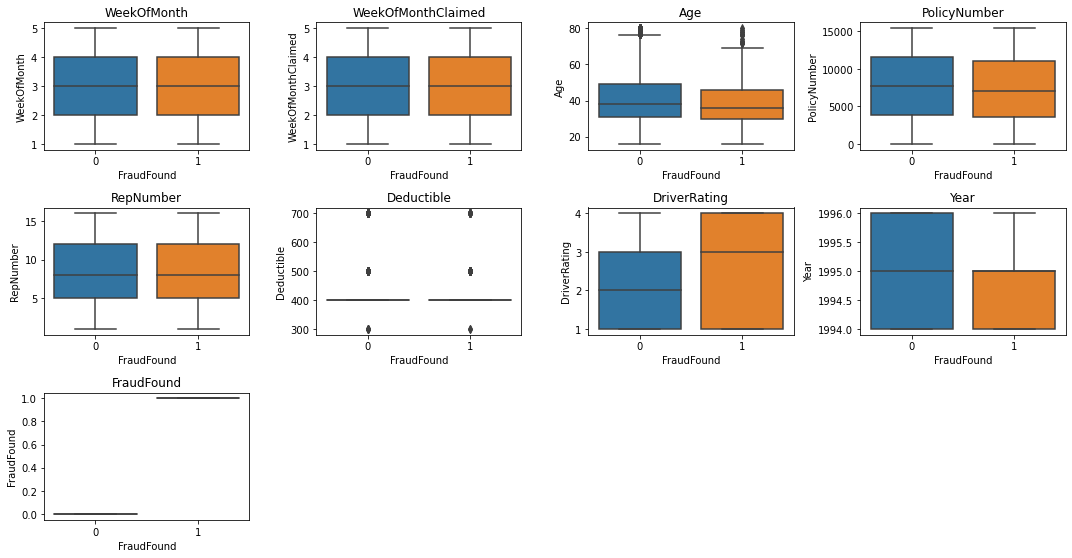

In [414]:
plt.figure(figsize=(15,10))
a=1
for i in num_cols:
    plt.subplot(4,4,a)
    sns.boxplot(data['FraudFound'],data[i])
    a+=1
    plt.title(i)
    plt.tight_layout()

* .Multi-Collineraity

# Statistical test

In [416]:
import scipy.stats as stats
sig_cat=[]
for i in cat_cols:
    tb=pd.crosstab(data.loc[:,i],data.FraudFound)
    teststats,pvalue,df,exp_freq= stats.chi2_contingency(tb)
    if(pvalue<0.05):
        print(i)
        sig_cat.append(i)

Month
Make
AccidentArea
MonthClaimed
Sex
Fault
PolicyType
VehicleCategory
VehiclePrice
Days:Policy-Accident
PastNumberOfClaims
AgeOfVehicle
AgeOfPolicyHolder
AgentType
NumberOfSuppliments
AddressChange-Claim
BasePolicy


In [417]:
sig_num1=[]

for i in num_cols:
    zero= data.loc[data.FraudFound==0,i]
    one= data.loc[data.FraudFound==1,i]
    teststats,pvalue = stats.ttest_ind(zero,one)
    if pvalue<0.05:
        sig_num1.append(i)
        print(i)

Age
PolicyNumber
Deductible
Year
FraudFound


# Building Base Model

In [42]:
# Encoding

df1=pd.get_dummies(data,drop_first=True)

In [47]:
df1.shape
print('After dummie encoding ' ,df1.shape)

After dummie encoding  (15420, 125)


* The base model for our dataset we used the  = 'DecisionTreeClassifier'

In [420]:
x= df1.drop('FraudFound',axis=1)
y=df1['FraudFound']

In [421]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

kfold=KFold(n_splits=5,shuffle=True,random_state=10)
pred=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    xtest=x.loc[test_index]
    ytest=y.loc[test_index]
    pred=DT.fit(xtrain,ytrain).predict(xtest)

In [422]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2921
           1       0.32      0.35      0.33       163

    accuracy                           0.93      3084
   macro avg       0.64      0.65      0.65      3084
weighted avg       0.93      0.93      0.93      3084



In [423]:
print('Accuracy:',np.round(accuracy_score(ytest,pred),2))
print('F1-Score:',np.round(f1_score(ytest,pred),2))
print('Precision score:',np.round(precision_score(ytest,pred),2))
print('Recall score:',np.round(recall_score(ytest,pred),2))

Accuracy: 0.93
F1-Score: 0.33
Precision score: 0.32
Recall score: 0.35


# Feature Engineering

* For increasing the accuracy of the base model we perform the feature scaling .

In [424]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [425]:
# converting column which are categorical in the nature to object 


data['WeekOfMonth']=data['WeekOfMonth'].astype('object')
data['WeekOfMonthClaimed']=data['WeekOfMonthClaimed'].astype('object')
data['DriverRating']=data['DriverRating'].astype('object')
data['Year']=data['Year'].astype('object')
data['RepNumber']=data['RepNumber'].astype('object')

* 1.Month
* 2.Monthclaimed

In [426]:
# For Month and Monthclaimed columns

def monthcat(x):
    if x in ['Jan','Feb','Mar']:
        return 'Q1'
    if x in ['Apr','May','Jun']:
        return 'Q2'
    if x in ['Jul','Aug','Sep']:
        return 'Q3'
    else:
        return 'Q4'
    
data['Month']=data['Month'].apply(monthcat)

data['MonthClaimed']=data['MonthClaimed'].apply(monthcat)

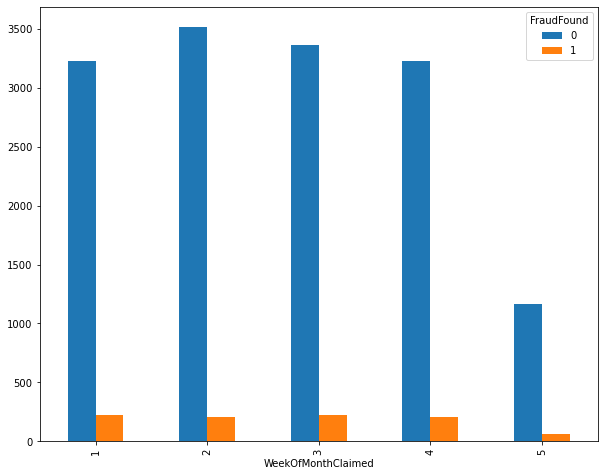

In [427]:
# For Weekofmonth and Weekofmonthclaimed column

pd.crosstab(data['WeekOfMonthClaimed'],data['FraudFound']).plot(kind='bar')
plt.show()

# We are unable to find any pattern in week column also the significance value is high so we will drop it 

data.drop('WeekOfMonthClaimed',axis=1,inplace=True)
data.drop('WeekOfMonth',axis=1,inplace=True)

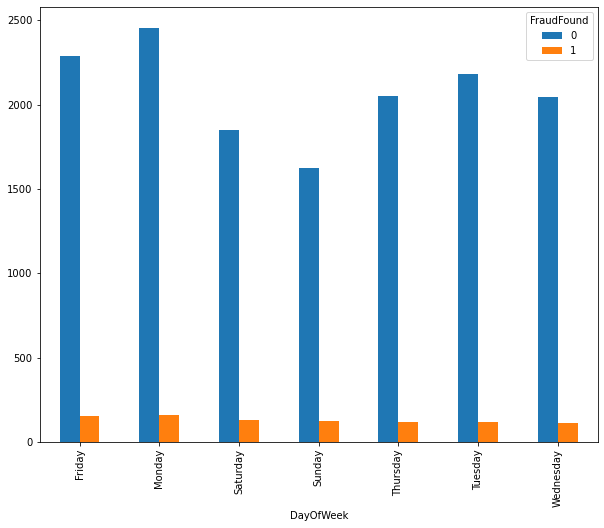

In [428]:
# For dayofweek and dayofweekclaimed columns

pd.crosstab(data['DayOfWeek'],data['FraudFound']).plot(kind='bar')
plt.show()

# We are unable to find any pattern in Day column also the significance value is high so we will drop it

data.drop(['DayOfWeek','DayOfWeekClaimed'],axis=1,inplace=True)

In [429]:
data.Make.unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

* 3.Make

In [430]:
# For Make column

# We will bin the cars on the basis of count of the manufacturer

data['Make'].value_counts()
def makegroup(x):
    if x=='Pontiac':
        return 'Pontiac'
    if x=='Toyota':
        return 'Toyota'
    if x=='Honda':
        return 'Honda'
    if x=='Mazda':
        return 'Mazda'
    if x=='Chevrolet':
        return 'Chevrolet'
    else:
        return 'Others'
    
    
data['Make']=data['Make'].apply(makegroup)

stats.chi2_contingency(pd.crosstab(data['Make'],data['FraudFound']))


(15.271477136780934,
 0.00926320754037813,
 5,
 array([[1580.37983139,  100.62016861],
        [2633.33962387,  167.66037613],
        [2213.09584955,  140.90415045],
        [1528.67198444,   97.32801556],
        [3607.32743191,  229.67256809],
        [2934.18527886,  186.81472114]]))

* 4.MaritalStatus

In [431]:
data['MaritalStatus'].value_counts(normalize=True)*100

Married     68.904021
Single      30.376135
Divorced     0.492866
Widow        0.226978
Name: MaritalStatus, dtype: float64

In [432]:
# For Marital status column

def marital(x):
    if x in ['Divorced','Widow']:
        return 'Others'
    else:
        return x
    
data['MaritalStatus']=data['MaritalStatus'].apply(marital)

In [433]:
data.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Q4,Honda,Urban,Q1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Q1,Honda,Urban,Q1,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Q4,Honda,Urban,Q4,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Q2,Toyota,Rural,Q3,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Q1,Honda,Urban,Q1,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [434]:
# For VehicleCategory, BasePolicy 

# We already have combined column for these 2 features (PolicyType) so we will drop these 2 columns

data.drop(['VehicleCategory','BasePolicy'],axis=1,inplace=True)

In [435]:
## for PolicyNumber and RepNumber
# Policy number has unique values so we will drop it
# Rep number is not providing any tred and also its not significant statistically

data.drop(['PolicyNumber','RepNumber'],axis=1,inplace=True)

* 5'Days:Policy-Claim
* 6 'Days:Policy-Accident'

In [436]:
data['Days:Policy-Claim'].value_counts(normalize=True)*100

more than 30    99.494163
15 to 30         0.363165
8 to 15          0.136187
none             0.006485
Name: Days:Policy-Claim, dtype: float64

In [437]:
data.head()
# For Days:Policy-Accident and Days:Policy-Claim columns
# bining column to 2 categories

def daycat(x):
    if x in ['more than 30']:
        return 'more than 30'
    else:
        return 'Less than 30'
    
data['Days:Policy-Accident']=data['Days:Policy-Accident'].apply(daycat)
data['Days:Policy-Claim']=data['Days:Policy-Claim'].apply(daycat)

In [438]:
data['Days:Policy-Accident'].value_counts()

more than 30    15247
Less than 30      173
Name: Days:Policy-Accident, dtype: int64

In [439]:
data.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound
0,Q4,Honda,Urban,Q1,Female,Single,21,Policy Holder,Sport - Liability,"more than 69,000",300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,0
1,Q1,Honda,Urban,Q1,Male,Single,34,Policy Holder,Sport - Collision,"more than 69,000",400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,0
2,Q4,Honda,Urban,Q4,Male,Married,47,Policy Holder,Sport - Collision,"more than 69,000",400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,0
3,Q2,Toyota,Rural,Q3,Male,Married,65,Third Party,Sedan - Liability,"20,000 to 29,000",400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,0
4,Q1,Honda,Urban,Q1,Female,Single,27,Third Party,Sport - Collision,"more than 69,000",400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,0


In [440]:
data['AgeOfVehicle'].value_counts()

7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64

<AxesSubplot:xlabel='AgeOfVehicle'>

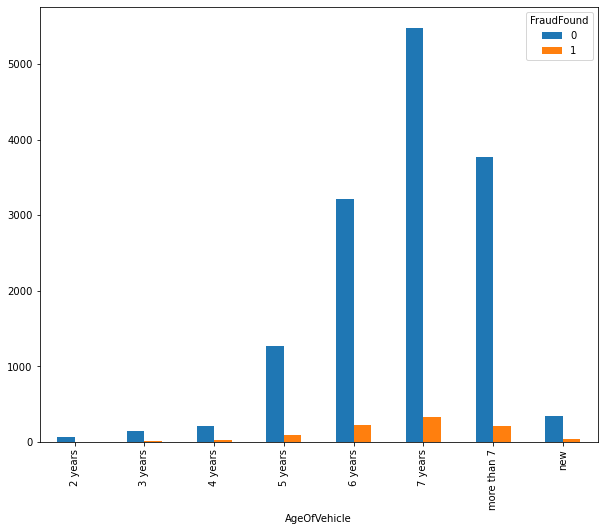

In [441]:
pd.crosstab(data['AgeOfVehicle'],data['FraudFound']).plot(kind='bar')

* 7 AgeOfVehicle

In [442]:
def vehcat(x):
    if x in ['new']:
        return 'Less than 1 year'
    if x in ['2 years','3 years','4 years']:
        return '2 to 4 years'
    if x in ['5 years','6 years']:
        return '5 to 6 years'
    else:
        return '7 & More than 7'
    
    
data['AgeOfVehicle']=data['AgeOfVehicle'].apply(vehcat)

stats.chi2_contingency(pd.crosstab(data['AgeOfVehicle'],data['FraudFound']))

(18.3352948277005,
 0.00037507833747261056,
 3,
 array([[ 426.82477302,   27.17522698],
        [4517.38553826,  287.61446174],
        [9202.11647211,  585.88352789],
        [ 350.6732166 ,   22.3267834 ]]))

In [443]:
data.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound
0,Q4,Honda,Urban,Q1,Female,Single,21,Policy Holder,Sport - Liability,"more than 69,000",300,1,more than 30,more than 30,none,2 to 4 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,0
1,Q1,Honda,Urban,Q1,Male,Single,34,Policy Holder,Sport - Collision,"more than 69,000",400,4,more than 30,more than 30,none,5 to 6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,0
2,Q4,Honda,Urban,Q4,Male,Married,47,Policy Holder,Sport - Collision,"more than 69,000",400,3,more than 30,more than 30,1,7 & More than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,0
3,Q2,Toyota,Rural,Q3,Male,Married,65,Third Party,Sedan - Liability,"20,000 to 29,000",400,2,more than 30,more than 30,1,7 & More than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,0
4,Q1,Honda,Urban,Q1,Female,Single,27,Third Party,Sport - Collision,"more than 69,000",400,1,more than 30,more than 30,none,5 to 6 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,0


In [444]:
## For AgeOfPolicyHolder column we alreay have age column so we will drop it

data.drop('AgeOfPolicyHolder',axis=1,inplace=True)

In [445]:
data.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound
0,Q4,Honda,Urban,Q1,Female,Single,21,Policy Holder,Sport - Liability,"more than 69,000",300,1,more than 30,more than 30,none,2 to 4 years,No,No,External,none,1 year,3 to 4,1994,0
1,Q1,Honda,Urban,Q1,Male,Single,34,Policy Holder,Sport - Collision,"more than 69,000",400,4,more than 30,more than 30,none,5 to 6 years,Yes,No,External,none,no change,1 vehicle,1994,0
2,Q4,Honda,Urban,Q4,Male,Married,47,Policy Holder,Sport - Collision,"more than 69,000",400,3,more than 30,more than 30,1,7 & More than 7,No,No,External,none,no change,1 vehicle,1994,0
3,Q2,Toyota,Rural,Q3,Male,Married,65,Third Party,Sedan - Liability,"20,000 to 29,000",400,2,more than 30,more than 30,1,7 & More than 7,Yes,No,External,more than 5,no change,1 vehicle,1994,0
4,Q1,Honda,Urban,Q1,Female,Single,27,Third Party,Sport - Collision,"more than 69,000",400,1,more than 30,more than 30,none,5 to 6 years,No,No,External,none,no change,1 vehicle,1994,0


* 8 AddressChange-Claim

In [446]:
data['AddressChange-Claim'].value_counts(normalize=True)*100

no change         92.892348
4 to 8 years       4.092088
2 to 3 years       1.887160
1 year             1.102464
under 6 months     0.025940
Name: AddressChange-Claim, dtype: float64

In [447]:
# for address change claim column we will make 2 bins for the change and no change

def address(x):
    if x in ['no change']:
        return 'no change'
    else:
        return 'Change'
    
data['AddressChange-Claim']=data['AddressChange-Claim'].apply(address)

stats.chi2_contingency(pd.crosstab(data['AddressChange-Claim'],data['FraudFound']))

(17.75746187507465,
 2.5093135071962023e-05,
 1,
 array([[ 1030.39636835,    65.60363165],
        [13466.60363165,   857.39636835]]))

In [448]:
# for numberofcars column

# As per the statistical POV the number of cars is not providing any trend

data.drop('NumberOfCars',axis=1,inplace=True)

In [450]:
data.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,FraudFound
0,Q4,Honda,Urban,Q1,Female,Single,21,Policy Holder,Sport - Liability,"more than 69,000",300,1,more than 30,more than 30,none,2 to 4 years,No,No,External,none,Change,0
1,Q1,Honda,Urban,Q1,Male,Single,34,Policy Holder,Sport - Collision,"more than 69,000",400,4,more than 30,more than 30,none,5 to 6 years,Yes,No,External,none,no change,0
2,Q4,Honda,Urban,Q4,Male,Married,47,Policy Holder,Sport - Collision,"more than 69,000",400,3,more than 30,more than 30,1,7 & More than 7,No,No,External,none,no change,0
3,Q2,Toyota,Rural,Q3,Male,Married,65,Third Party,Sedan - Liability,"20,000 to 29,000",400,2,more than 30,more than 30,1,7 & More than 7,Yes,No,External,more than 5,no change,0
4,Q1,Honda,Urban,Q1,Female,Single,27,Third Party,Sport - Collision,"more than 69,000",400,1,more than 30,more than 30,none,5 to 6 years,No,No,External,none,no change,0


In [49]:
print('After feature engennering and droping columns :' ,data.shape)

After feature engennering and droping columns : (15420, 33)


# Model Building 

* With imbalance data

In [453]:
encoded_data=pd.get_dummies(data,drop_first=True)

x=encoded_data.drop('FraudFound',axis=1)
y=encoded_data['FraudFound']

In [454]:
x.shape,y.shape

((15420, 49), (15420,))

In [455]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier

DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
xgb=XGBClassifier()
svc=SVC()
ada=AdaBoostClassifier()

* 1. Decision Tree

In [456]:
kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_DT=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    xtest=x.loc[test_index]
    ytest=y.loc[test_index]
    predd_DT=DT.fit(xtrain,ytrain).predict(xtest)
        

In [457]:
print(classification_report(ytest,predd_DT))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2921
           1       0.11      0.15      0.13       163

    accuracy                           0.89      3084
   macro avg       0.53      0.54      0.54      3084
weighted avg       0.91      0.89      0.90      3084



* 2.Random forest

In [458]:
kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_RF=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    xtest=x.loc[test_index]
    ytest=y.loc[test_index]
    predd_RF=RF.fit(xtrain,ytrain).predict(xtest)
        

In [459]:
print(classification_report(ytest,predd_RF))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2921
           1       0.45      0.03      0.06       163

    accuracy                           0.95      3084
   macro avg       0.70      0.51      0.52      3084
weighted avg       0.92      0.95      0.92      3084



* 3.XGBClassifier

In [460]:
kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_xgb=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    xtest=x.loc[test_index]
    ytest=y.loc[test_index]
    predd_xgb=xgb.fit(xtrain,ytrain).predict(xtest)
        

In [461]:
print(classification_report(ytest,predd_xgb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2921
           1       0.35      0.06      0.10       163

    accuracy                           0.94      3084
   macro avg       0.65      0.52      0.53      3084
weighted avg       0.92      0.94      0.93      3084



* 4 .SVC

In [462]:
kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_svc=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    xtest=x.loc[test_index]
    ytest=y.loc[test_index]
    predd_svc=svc.fit(xtrain,ytrain).predict(xtest)
        

In [463]:
print(classification_report(ytest,predd_svc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2921
           1       0.00      0.00      0.00       163

    accuracy                           0.95      3084
   macro avg       0.47      0.50      0.49      3084
weighted avg       0.90      0.95      0.92      3084



* 5 .AdaBoostClassifier

In [464]:
kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_ada=[]

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    xtest=x.loc[test_index]
    ytest=y.loc[test_index]
    predd_ada=ada.fit(xtrain,ytrain).predict(xtest)
        

In [465]:
print(classification_report(ytest,predd_svc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2921
           1       0.00      0.00      0.00       163

    accuracy                           0.95      3084
   macro avg       0.47      0.50      0.49      3084
weighted avg       0.90      0.95      0.92      3084



* XGB is giving better performance.

* As the data is imbalance lets use SMOTE and try to check the model performancce

In [467]:
from imblearn.over_sampling import SMOTE

encoded_data=pd.get_dummies(data,drop_first=True)

x=encoded_data.drop('FraudFound',axis=1)
y=encoded_data['FraudFound']

sm=SMOTE(random_state=10)

In [468]:
x_resample,y_resample=sm.fit_resample(x,y)
y_resample.value_counts()

0    14497
1    14497
Name: FraudFound, dtype: int64

In [469]:
# Decision Tree

kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_DT_res=[]

for train_index,test_index in kfold.split(x_resample,y_resample):
    xtrain=x_resample.loc[train_index]
    ytrain=y_resample.loc[train_index]
    xtest=x_resample.loc[test_index]
    ytest=y_resample.loc[test_index]
    predd_DT_res=DT.fit(xtrain,ytrain).predict(xtest)
        

In [470]:
print(classification_report(ytest,predd_DT_res))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2859
           1       0.92      0.96      0.94      2939

    accuracy                           0.94      5798
   macro avg       0.94      0.94      0.94      5798
weighted avg       0.94      0.94      0.94      5798



In [471]:
# Random forest

kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_RF_res=[]

for train_index,test_index in kfold.split(x_resample,y_resample):
    xtrain=x_resample.loc[train_index]
    ytrain=y_resample.loc[train_index]
    xtest=x_resample.loc[test_index]
    ytest=y_resample.loc[test_index]
    predd_RF_res=RF.fit(xtrain,ytrain).predict(xtest)
        

In [472]:
print(classification_report(ytest,predd_RF_res))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2859
           1       0.95      0.96      0.96      2939

    accuracy                           0.96      5798
   macro avg       0.96      0.96      0.96      5798
weighted avg       0.96      0.96      0.96      5798



In [473]:
# XGB

kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_xgb_res=[]

for train_index,test_index in kfold.split(x_resample,y_resample):
    xtrain=x_resample.loc[train_index]
    ytrain=y_resample.loc[train_index]
    xtest=x_resample.loc[test_index]
    ytest=y_resample.loc[test_index]
    predd_xgb_res=xgb.fit(xtrain,ytrain).predict(xtest)
        

In [474]:
print(classification_report(ytest,predd_xgb_res))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2859
           1       0.94      0.96      0.95      2939

    accuracy                           0.95      5798
   macro avg       0.95      0.95      0.95      5798
weighted avg       0.95      0.95      0.95      5798



In [ ]:
## Using hyperparameter tuning

In [313]:
from sklearn.model_selection import GridSearchCV

In [315]:
# type your code here

tuned_parameters=[{"n_estimators" : [100, 120, 150],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]}]

xgbmodel=XGBClassifier(random_state=10)

xgb_grid=GridSearchCV(estimator=xgbmodel,
                     param_grid=tuned_parameters,
                     cv=5)
xgbmodel=xgb_grid.fit(xtrain,ytrain)

xgbmodel.best_params_

{'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 150}

In [ ]:
# {'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 150}

In [475]:
# Tuned xgb

kfold=KFold(n_splits=5,shuffle=True,random_state=10)
predd_xgb_tuned=[]
xgb=XGBClassifier(gamma= 2, learning_rate= 0.15, max_depth= 6, n_estimators= 150)

for train_index,test_index in kfold.split(x_resample,y_resample):
    xtrain=x_resample.loc[train_index]
    ytrain=y_resample.loc[train_index]
    xtest=x_resample.loc[test_index]
    ytest=y_resample.loc[test_index]
    predd_xgb_tuned=xgb.fit(xtrain,ytrain).predict(xtest)
        

In [476]:
print(classification_report(ytest,predd_xgb_tuned))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2859
           1       0.93      0.96      0.95      2939

    accuracy                           0.94      5798
   macro avg       0.94      0.94      0.94      5798
weighted avg       0.94      0.94      0.94      5798

